In [337]:
from paraview.simple import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

In [338]:
import matplotlib as mpl

mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['figure.labelsize'] = 'large'
mpl.rcParams['font.size'] = 15
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['legend.markerscale'] = 1.0
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4.5
savefig_directory = '../Figures/'
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15

In [339]:
# Case files
angles = ['0.091', '0.182', '0.273', '0.364', '0.419', '0.455', '0.546']
Theta = ['05', '10', '15', '20', '23', '25', '30']
folder = [f'src/angle_value_{angle}/case.foam' for angle in angles]

# Properties of interest with geometry storage
properties = ['Ma', 'T', 'p', 'U', 'rho']
store_files = ['Ma.png', 'T.png', 'p.png', 'U.png', 'rho.png']

# Lineplot points
csv_files = [f'Figures/angle_value_{angle}/lineplot.csv' for angle in angles]
Point1 = [0.5, 0.0, 1.0]
EPS = 1e-3
Point2_y = [0.091, 0.182, 0.273, 0.364, 0.419, 0.455, 0.546]
Point2_vec = [[1.5, point2+EPS, 1.0] for point2 in Point2_y]

# Plotting settings
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

In [340]:
# Load your case.foam file
foamCase = [OpenFOAMReader(FileName=folder_) for folder_ in folder]

# Update pipeline to read the time steps, etc.
[foamCase_.UpdatePipeline() for foamCase_ in foamCase]

[None, None, None, None, None, None, None]

In [341]:
foamCase_ = foamCase[0]

hasattr(foamCase_, "TimestepValues")
final_time = foamCase_.TimestepValues[-1]
final_time, foamCase_.TimestepValues, foamCase_.GetDataInformation().GetNumberOfCells(), foamCase_.GetDataInformation().GetNumberOfPoints()

(0.05,
 [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003, 0.0031, 0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049, 0.005, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057, 0.0058, 0.0059, 0.006, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008, 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.009, 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.01, 0.0101, 0.0102, 0.0103, 0.0104, 0.0105, 0.0106, 0.0107, 0.0108, 0.0109, 0.011, 0.0111, 0.0112, 0.0113, 0.0114, 0.0115, 0.0116, 0.0117, 0.0118, 0.0119, 0.012, 0.0121, 0.0122, 0.0123, 0.0124, 0.0125, 0.01

In [342]:
def store_geometry(foamCase, property, store_file):
    # Create a geometry view and show the data
    renderView = GetActiveViewOrCreate('RenderView')
    SetActiveSource(foamCase)
    display = Show(foamCase, renderView)
    
    # If foamCase has multiple time steps, update to the final time step.
    if hasattr(foamCase, "TimestepValues"):# and foamCase.TimestepValues:
        # final_time = foamCase.TimestepValues[-1]
        # UpdatePipeline(time=final_time)
        final_time = foamCase_.TimestepValues[-1]
        GetAnimationScene().AnimationTime = final_time
        renderView.Update()

    # Set properties to color by the specified property
    ColorBy(display, ('POINTS', property))
    display.RescaleTransferFunctionToDataRange(True)
    display.SetScalarBarVisibility(renderView, True)

    # Set the color map for the specific property
    lut = GetColorTransferFunction(property)
    lut.ApplyPreset('Cool to Warm', True)
    display.SetRepresentationType('Surface')
    display.SetScalarBarVisibility(renderView, True)

    # Set the camera
    # Reset the camera to what would be the default in ParaView
    ResetCamera()
    # Apply camera parallel projection (orthographic view)
    renderView.CameraParallelProjection = 1
    # Show the orientation axes for better spatial reference
    renderView.OrientationAxesVisibility = 1
    # Set the background color to white
    renderView.Background = [1.0, 1.0, 1.0]
    # Set the view size
    LoadPalette('WhiteBackground')
    renderView.ViewSize = [600, 600]

    # Store a figure
    if store_file is not None:
        # Make sure directory exists before saving
        store_dir = os.path.dirname(store_file)
        if store_dir and not os.path.exists(store_dir):
            os.makedirs(store_dir, exist_ok=True)
        SaveScreenshot(store_file, renderView, magnification=2, quality=100)

    # Clean up
    Delete(display)
    Delete(renderView)

In [343]:
# # Cutplots
# os.makedirs('Figures', exist_ok=True)
# # Loop over different geometries
# for i, foamCase_ in tqdm(enumerate(foamCase)):
#     # Set the active source to the current foamCase
#     # Loop through each property and store the geometry
#     store_file = f'Figures/angle_value_{angles[i]}'
#     os.makedirs(store_file, exist_ok=True)
#     # print(f'store_file: {store_file}')
#     for property, store_file_ in zip(properties, store_files):
#             store_file_ = f'{store_file}/{store_file_}'
#             # print(f'store_file_: {store_file_}')
#             store_geometry(foamCase_, property, store_file_)

In [344]:
def store_lineplot(foamCase, Point1, Point2, store_file, convergence=False):
    """
    Extract data along a line between Point1 and Point2, and save it to a CSV file.
    
    Parameters:
    -----------
    foamCase: paraview.servermanager.OpenFOAMReader
        The OpenFOAM reader object to extract data from
    Point1: list
        The starting point coordinates [x, y, z]
    Point2: list
        The ending point coordinates [x, y, z]
    store_file: str
        Path to save the CSV file
    """
    # Retrieve data information
    dataInfo = foamCase.GetDataInformation()

    # Get the total number of points (nodes) and cells
    total_points = dataInfo.GetNumberOfPoints()
    total_cells = dataInfo.GetNumberOfCells()

    print("Total number of points:", total_points)
    print("Total number of cells:", total_cells)
    # Create a render view for the pipeline
    renderView = GetActiveViewOrCreate('RenderView')

    # If foamCase has multiple time steps, update to the final time step.
    if hasattr(foamCase, "TimestepValues"):# and foamCase.TimestepValues:
        # final_time = foamCase.TimestepValues[-1]
        # UpdatePipeline(time=final_time)
        final_time = foamCase_.TimestepValues[-1]
        GetAnimationScene().AnimationTime = final_time
        renderView.Update()
    
    # Extract properties along a line
    lineSource = PlotOverLine(Input=foamCase)
    lineSource.Point1 = Point1
    lineSource.Point2 = Point2
    lineDisplay = Show(lineSource, renderView)
    lineDisplay.UpdatePipeline()

    # Render the view
    Render()

    # Make sure directory exists before saving
    store_dir = os.path.dirname(store_file)
    if store_dir and not os.path.exists(store_dir):
        os.makedirs(store_dir, exist_ok=True)
    
    # Add file extension if not present
    if not store_file.endswith('.csv'):
        store_file = store_file + '/lineplot.csv'
    
    # Save the line plot
    SaveData(store_file, proxy=lineSource)

    # Clean up
    Delete(lineSource)
    Delete(lineDisplay)
    Delete(renderView)

    if convergence:
        return total_points, total_cells

In [345]:
def plot_all_geometries(df, entry, angles, xlabel, ylabel, title, savefig=None, colors=colors):
    fig, axs = plt.subplots()
    for i, df_ in enumerate(df):
        xaxis = df_['Points:0'].values
        axs.plot(
            xaxis, df_[entry] / df_[entry].values[-1], 
            label=f'$\Theta$ = {Theta[i]}°', 
            color=colors[i]
        )
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    fig.suptitle(title)
    axs.legend()
    fig.tight_layout()
    if savefig is not None:
        fig.savefig(savefig, bbox_inches='tight')
    fig.show()

<>:7: SyntaxWarning: invalid escape sequence '\T'
<>:7: SyntaxWarning: invalid escape sequence '\T'
/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_56246/3424711049.py:7: SyntaxWarning: invalid escape sequence '\T'
  label=f'$\Theta$ = {Theta[i]}°',


In [346]:
# Loop over different geometries
for i, foamCase_ in tqdm(enumerate(foamCase)):
    store_lineplot(foamCase_, Point1, Point2_vec[i], csv_files[i])

2it [00:00,  6.42it/s]

Total number of points: 21222
Total number of cells: 10400
Total number of points: 21222
Total number of cells: 10400
Total number of points: 21222
Total number of cells: 10400


5it [00:00,  6.14it/s]

Total number of points: 21222
Total number of cells: 10400
Total number of points: 21222
Total number of cells: 10400
Total number of points: 21222
Total number of cells: 10400


7it [00:01,  6.19it/s]

Total number of points: 21222
Total number of cells: 10400


In [347]:
# Load the line plot data
df = [pd.read_csv(csv_file) for csv_file in csv_files]

In [348]:
store_lineplot(foamCase[0], [0, 0.5, 1], [1.5, 0.5, 1], 'rho_temp.csv')
df_rho = pd.read_csv('rho_temp.csv')
rho1 = df_rho['rho'].values[0]
os.remove('rho_temp.csv')

Total number of points: 21222
Total number of cells: 10400


Comparison of Theoretical and Numerical Values for Different Shock Angles

Attached shock values 

 Angle   |  Property  | Theoretical  |  Numerical   | Error % 
--------------------------------------------------------
   05    |     M2     |    1.720     |    1.801     |   4.70  %
         | rho2/rho1  |    1.190     |    1.218     |   2.36  %
         |   p2/p1    |    1.580     |    1.330     |  15.83  %
         |   T2/T1    |    1.100     |    1.092     |   0.74  %
--------------------------------------------------------
   10    |     M2     |    1.590     |    1.590     |   0.01  %
         | rho2/rho1  |    1.490     |    1.450     |   2.68  %
         |   p2/p1    |    1.760     |    1.736     |   1.39  %
         |   T2/T1    |    1.180     |    1.197     |   1.43  %
--------------------------------------------------------
   15    |     M2     |    1.360     |    1.359     |   0.04  %
         | rho2/rho1  |    1.880     |    1.692     |   9.99  %
         |   p2/p1    |    

<>:58: SyntaxWarning: invalid escape sequence '\T'
<>:58: SyntaxWarning: invalid escape sequence '\T'
/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_56246/729172624.py:58: SyntaxWarning: invalid escape sequence '\T'
  axs[row, col].set_xlabel('$\Theta$')


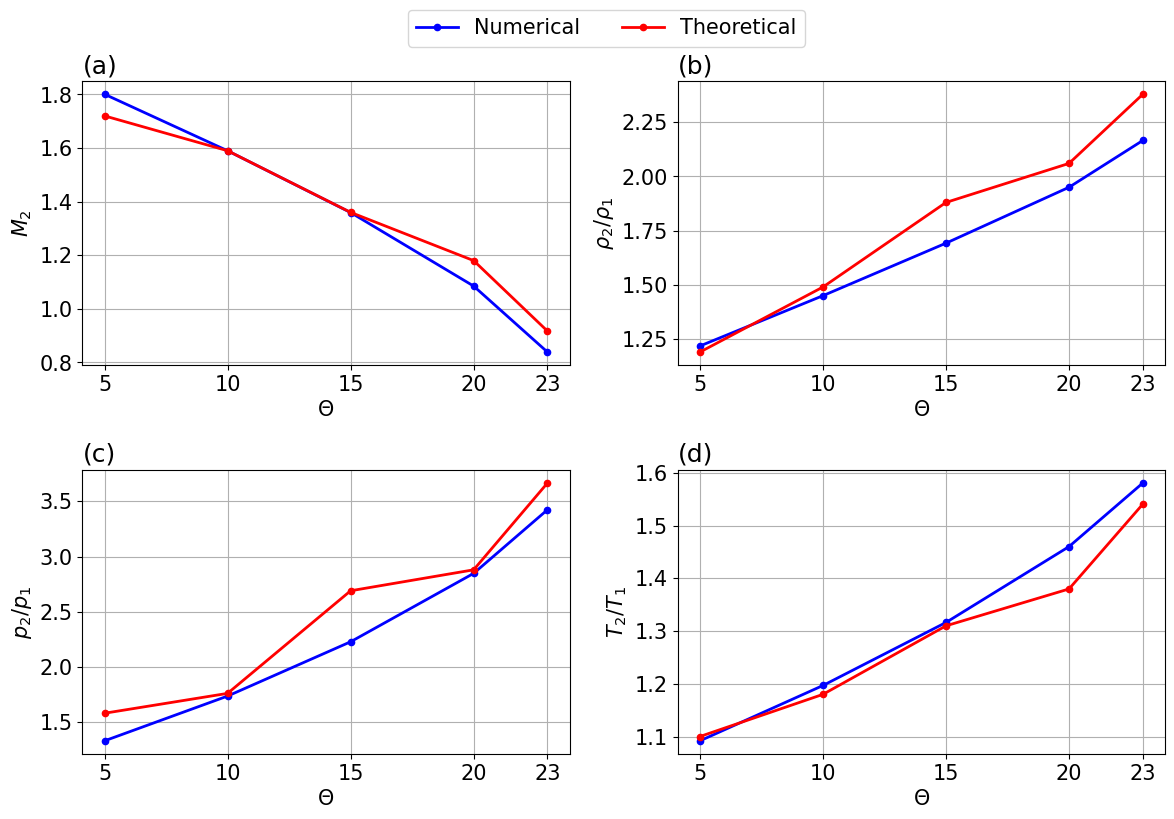

In [349]:
M1 = 2.
T1 = 300.
p1 = 101325.
molWeight = 28.9
R_ideal = 8.314
# rho1 = p1 / (molWeight * R_ideal * T1)  # kg/m^3 

M2 = np.array([df_['Ma'].values[-1] for df_ in df])
M2_true = [1.72, 1.59, 1.36, 1.18, 0.917]
rho2 = np.array([df_['rho'].values[-1] for df_ in df])
rho2rho1_true = [1.19, 1.49, 1.88, 2.06, 2.379]
p2 = np.array([df_['p'].values[-1] for df_ in df])
p2p1_true = [1.58, 1.76, 2.69, 2.88, 3.667]
T2 = np.array([df_['T'].values[-1] for df_ in df])
T2T1_true = [1.10, 1.18, 1.31, 1.38, 1.541]

# Create a formatted table comparing numerical vs theoretical values
print("Comparison of Theoretical and Numerical Values for Different Shock Angles\n")
print('Attached shock values \n')
print(f"{'Angle':^8} | {'Property':^10} | {'Theoretical':^12} | {'Numerical':^12} | {'Error %':^8}")
print("-" * 56)

for i in range(5):
    print(f"{Theta[i]:^8} | {'M2':^10} | {M2_true[i]:^12.3f} | {M2[i]:^12.3f} | {abs(M2[i]-M2_true[i])/M2_true[i]*100:^8.2f}%")
    print(f"{' ':^8} | {'rho2/rho1':^10} | {rho2rho1_true[i]:^12.3f} | {rho2[i]/rho1:^12.3f} | {abs(rho2[i]/rho1-rho2rho1_true[i])/rho2rho1_true[i]*100:^8.2f}%")
    print(f"{' ':^8} | {'p2/p1':^10} | {p2p1_true[i]:^12.3f} | {p2[i]/p1:^12.3f} | {abs(p2[i]/p1-p2p1_true[i])/p2p1_true[i]*100:^8.2f}%")
    print(f"{' ':^8} | {'T2/T1':^10} | {T2T1_true[i]:^12.3f} | {T2[i]/T1:^12.3f} | {abs(T2[i]/T1-T2T1_true[i])/T2T1_true[i]*100:^8.2f}%")
    # if i < 3:  # Don't print separator after the last angle
    print("-" * 56)

print('\n \n Detached shock values \n')
print("-" * 32)
# Print the values for the detached shock (Theta = 25, Theta = 30)
for i in range(5, 7):
    print(f"{Theta[i]:^8} | {'M2':^10} | {M2[i]:^12.3f}")
    # Just print the numerical values for the detached shock
    print(f"{' ':^8} | {'rho2/rho1':^10} | {rho2[i]/rho1:^12.3f}")
    print(f"{' ':^8} | {'p2/p1':^10} | {p2[i]/p1:^12.3f}")
    print(f"{' ':^8} | {'T2/T1':^10} | {T2[i]/T1:^12.3f}")
    if i < 6:
        print("-" * 32)
# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
properties = ['M2', 'rho2/rho1', 'p2/p1', 'T2/T1']
values = [M2, rho2/rho1, p2/p1, T2/T1]
true_values = [M2_true, rho2rho1_true, p2p1_true, T2T1_true]
titles = ['(a)', '(b)', '(c)', '(d)']
y_labels = ['$M_2$', '$\\rho_2 / \\rho_1$', '$p_2 / p_1$', '$T_2 / T_1$']


# Plot each property in its respective subplot
for i, (prop, val, true_val, title, y_label) in enumerate(zip(properties, values, true_values, titles, y_labels)):
    row, col = i // 2, i % 2
    Theta_num = [float(theta) for theta in Theta]  # Exclude the last two angles
    axs[row, col].plot(Theta_num[:-2], val[:-2], marker='o', color='blue')
    axs[row, col].plot(Theta_num[:-2], true_val, marker='o', color='red')
    axs[row, col].set_title(title, loc='left')
    axs[row, col].set_xlabel('$\Theta$')
    axs[row, col].set_ylabel(y_label)
axs[0,0].plot([], [], marker='o', color='blue', label='Numerical')
axs[0,0].plot([], [], marker='o', color='red', label='Theoretical')
[ax.set_xticks(Theta_num[:-2]) for ax in axs.flatten()]
# Create a single legend for all subplots
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, ['Numerical', 'Theoretical'], bbox_to_anchor=(0.69, 1.04), ncol=2)
# Adjust layout
plt.tight_layout()
# Save the figure
plt.savefig('Figures/angle_value_results.pdf', bbox_inches='tight')
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\T'
<>:16: SyntaxWarning: invalid escape sequence '\T'
/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_56246/2924536958.py:16: SyntaxWarning: invalid escape sequence '\T'
  [axs[0,0].plot([], [], color=colors[i], label=f'$\Theta$ = {Theta[i]}°') for i in range(7)]
/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_56246/2924536958.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


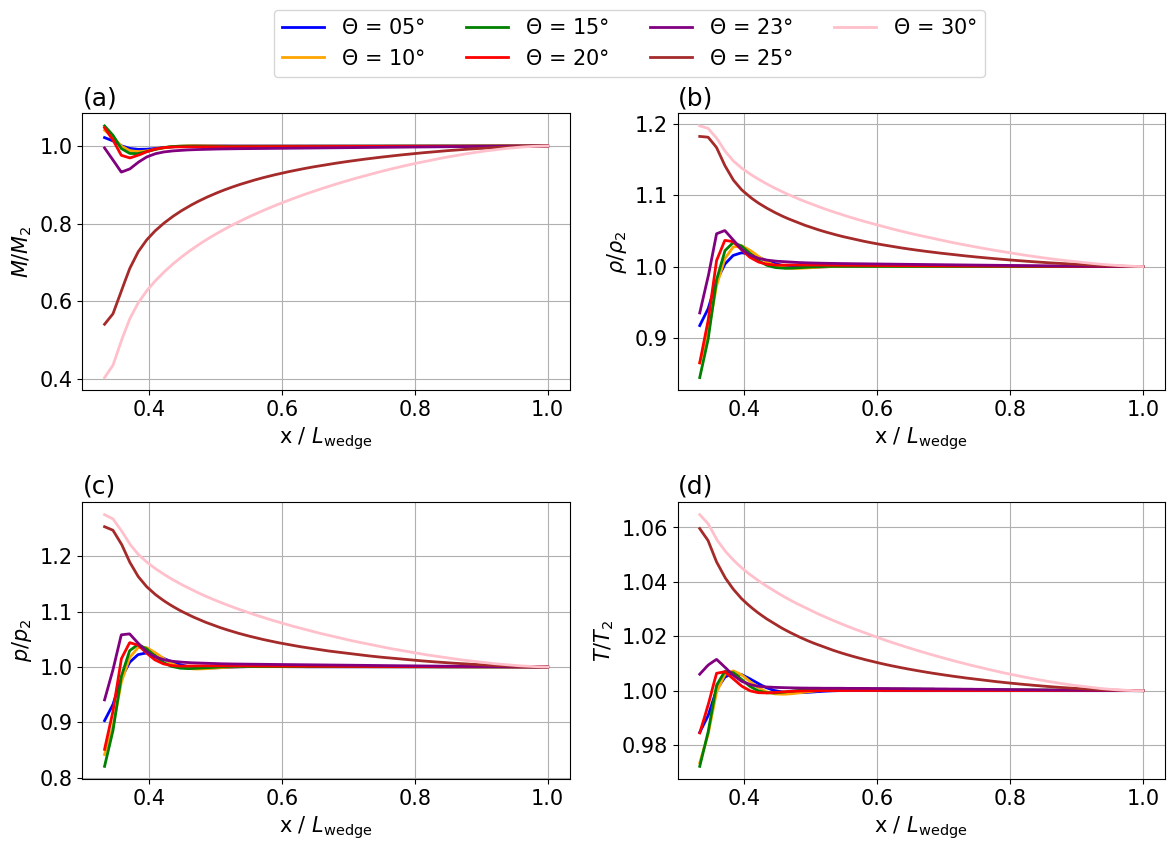

In [350]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
title = ['(a)', '(b)', '(c)', '(d)']
ylabels = ['$M/M_2$', '$\\rho/\\rho_2$', '$p/p_2$', '$T/T_2$']
for enum, entry in enumerate(['Ma', 'rho', 'p', 'T']): 
    row, col = enum // 2, enum % 2
    for i, df_ in enumerate(df):
        xaxis = df_['Points:0'].values
        axs[row, col].plot(
            xaxis / xaxis[-1], 
            df_[entry] / df_[entry].values[-1], 
            color=colors[i]
        )
    axs[row, col].set_xlabel('x / $L_{\\text{wedge}}$')
    axs[row, col].set_ylabel(ylabels[enum])
    axs[row, col].set_title(title[enum], loc='left')
[axs[0,0].plot([], [], color=colors[i], label=f'$\Theta$ = {Theta[i]}°') for i in range(7)]
# Create a single legend for all subplots
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.84, 1.08), ncol=4)
fig.tight_layout()
fig.savefig('Figures/angle_value_lineplot.pdf', bbox_inches='tight')
fig.show()

/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_56246/3424711049.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_56246/3424711049.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_56246/3424711049.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_56246/3424711049.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


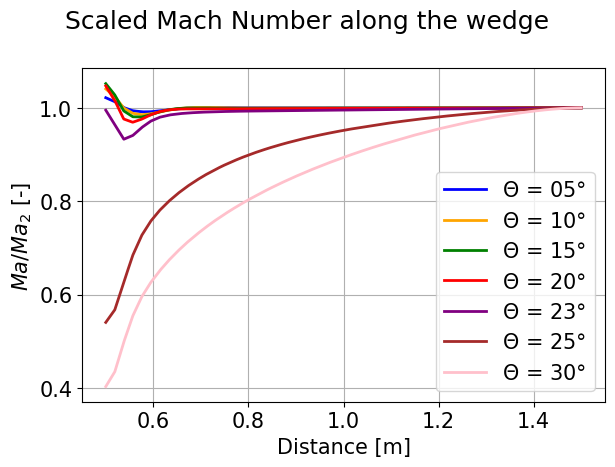

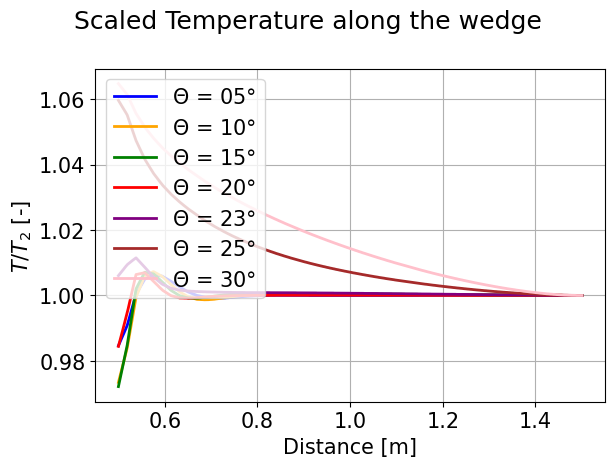

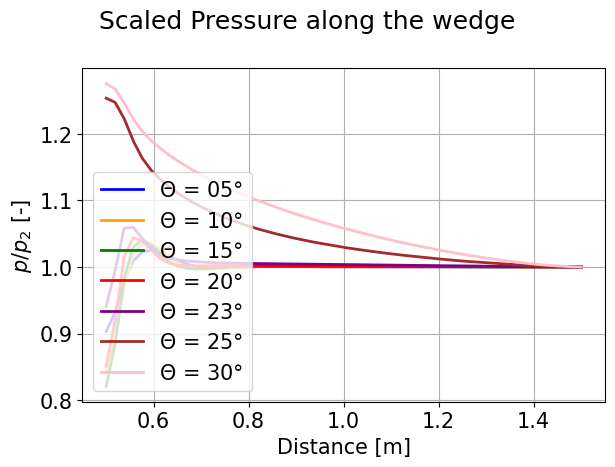

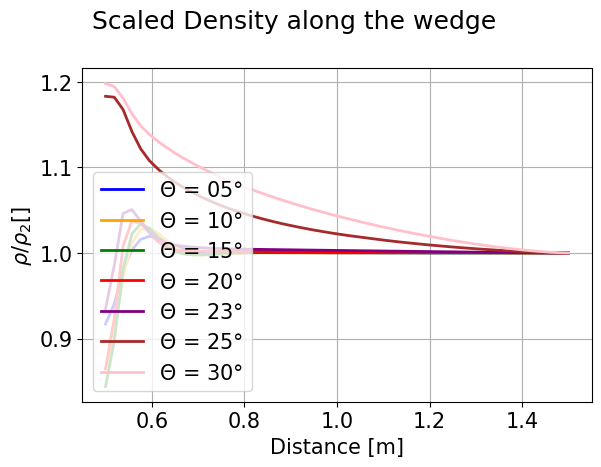

In [351]:
ylabels = [
    '$Ma / Ma_2$ [-]', 
    '$T / T_2$ [-]', 
    '$p / p_2$ [-]', 
    '$\\rho / \\rho_2 []$',
    # 'Velocity'
]
Title = [
    'Scaled Mach Number along the wedge', 
    'Scaled Temperature along the wedge', 
    'Scaled Pressure along the wedge', 
    'Scaled Density along the wedge',
    # 'Velocity along the line'
]
# if not in os.path.exists('Figures/LinePlots'):
os.makedirs('Figures/LinePlots', exist_ok=True)
for prop, ylab, titl in zip(['Ma', 'T', 'p', 'rho'], ylabels, Title):
    savefig = f'Figures/LinePlots/{prop}.pdf'
    plot_all_geometries(
        df=df, 
        entry=prop, 
        angles=angles, 
        xlabel='Distance [m]',
        ylabel=ylab, 
        title=titl, 
        savefig=savefig
    )

# Convergence Analysis

## Grid

In [352]:
# Case files
nx = [50, 100]
folder_convergence = [f'src/convergence_{nx_}/case.foam' for nx_ in nx]

# Properties of interest with geometry storage
properties = ['Ma', 'T', 'p', 'U', 'rho']

# Lineplot points
csv_files_convergence = [f'Figures/convergence/lineplot_{nx_}.csv' for nx_ in nx]
Point1_convergence = [0.5, 0.0, 1.0]
EPS = 1e-1
Point2_convergence = [1.5, 0.364 + EPS, 1.0]

In [353]:
# Load your case.foam file
foamCase_convergence = [OpenFOAMReader(FileName=folder_) for folder_ in folder_convergence]

# Update pipeline to read the time steps, etc.
[foamCase_.UpdatePipeline() for foamCase_ in foamCase_convergence]

[None, None]

In [354]:
os.makedirs('Figures/convergence', exist_ok=True)
# Loop over different geometries
total_points, total_cells = [], []
for i, foamCase_ in tqdm(enumerate(foamCase_convergence)):
    total_points_, total_cells_ = store_lineplot(foamCase_, Point1_convergence, Point2_convergence, csv_files_convergence[i], convergence=True)
    total_points.append(total_points_)
    total_cells.append(total_cells_)

2it [00:00,  6.44it/s]

Total number of points: 21222
Total number of cells: 10400
Total number of points: 21222
Total number of cells: 10400


In [355]:
df_convergence = [pd.read_csv(csv_file) for csv_file in csv_files_convergence]
df_convergence

[           Ma       T     U:0      U:1           U:2         p     rho   
 0     0.82734  478.01  366.67   64.562  1.127200e-16  328300.0  2.3872  \
 1     0.82666  478.00  365.99   65.262  1.094300e-16  329100.0  2.3930   
 2     0.82594  478.00  365.29   65.969  1.061600e-16  329900.0  2.3988   
 3     0.82518  478.00  364.58   66.685  1.029000e-16  330720.0  2.4046   
 4     0.82438  478.00  363.85   67.409  9.965900e-17  331550.0  2.4106   
 ...       ...     ...     ...      ...           ...       ...     ...   
 996   0.92876  460.93  369.24  154.650  8.932100e-18  346030.0  2.6094   
 997   0.92884  460.92  369.26  154.660  6.674300e-18  346030.0  2.6095   
 998   0.92892  460.91  369.29  154.680  4.432800e-18  346030.0  2.6096   
 999   0.92900  460.89  369.32  154.690  2.208200e-18  346030.0  2.6096   
 1000  0.92909  460.88  369.34  154.710  0.000000e+00  346030.0  2.6097   
 
       vtkValidPointMask  arc_length  Points:0  Points:1  Points:2  
 0                     1    0

/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_56246/3442944195.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_56246/3442944195.py:64: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


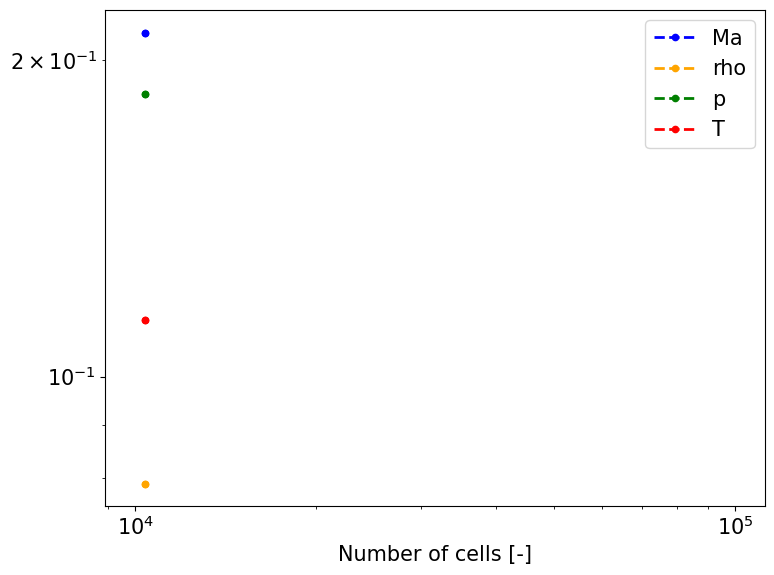

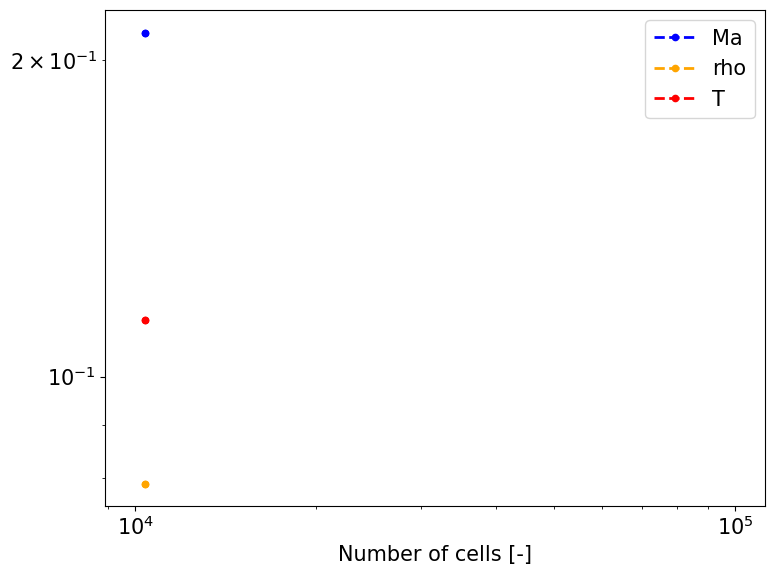

In [356]:
Ma2, T2, T2T1, p2, p2p1, rho2, rho2rho1 = [], [], [], [], [], [], []
for i, df_ in enumerate(df_convergence):
    Ma2.append(df_['Ma'].values[-1])
    rho2.append(df_['rho'].values[-1])
    rho2rho1.append(df_['rho'].values[-1] / rho1)
    T2.append(df_['T'].values[-1])
    T2T1.append(df_['T'].values[-1] / T1)
    p2.append(df_['p'].values[-1])
    p2p1.append(df_['p'].values[-1] / p1)
Ma2 = np.array(Ma2)
rho2, rho2rho1 = np.array(rho2), np.array(rho2rho1)
T2, T2T1 = np.array(T2), np.array(T2T1)
p2, p2p1 = np.array(p2), np.array(p2p1)
properties_analytical = [ # Ma2, p2/p1, T2/T1
    1.18, 
    2.06,
    2.88,
    1.38
]

error_absolute = [
    np.abs(Ma2 - properties_analytical[0]),  
    np.abs(rho2rho1 - properties_analytical[1]),
    np.abs(p2p1 - properties_analytical[2]),
    np.abs(T2T1 - properties_analytical[3]),
]
error_relative = [
    np.abs(Ma2 - properties_analytical[0]) / properties_analytical[0],
    np.abs(rho2rho1 - properties_analytical[1]) / properties_analytical[1],
    np.abs(p2p1 - properties_analytical[2]) / properties_analytical[2],
    np.abs(T2T1 - properties_analytical[3]) / properties_analytical[3],
]

fig, axs = plt.subplots(figsize=(8, 6), sharex=True)
for i, (err_rel, label, color) in enumerate(zip(error_relative, ['Ma', 'rho', 'p', 'T'], colors)):
    axs.loglog(
        total_cells, err_rel, 
        '--o',
        label=f'{label}', 
        color=color
    )
axs.set_xlabel('Number of cells [-]')
axs.legend()
axs.grid()
fig.tight_layout()
# if savefig is not None:
fig.savefig('Figures/GridConvergence.pdf', bbox_inches='tight')
fig.show()

fig, axs = plt.subplots(figsize=(8, 6), sharex=True)
for i, (err_rel, label, color) in enumerate(zip(error_relative, ['Ma', 'rho', 'p', 'T'], colors)):
    if label == 'p':
        continue
    axs.loglog(
        total_cells, err_rel, 
        '--o',
        label=f'{label}', 
        color=color
    )
axs.set_xlabel('Number of cells [-]')
axs.legend()
axs.grid()
fig.tight_layout()
fig.show()

## Residuals

In [357]:
def extract_residuals(case_reader):
    """Extract residual data from a case reader for all properties."""
    # Get the available time steps
    timeSteps = case_reader.TimestepValues
    local_residuals = {}
    
    for prop in properties:
        local_residuals[prop] = {'avg': [], 'min': [], 'max': []}
    
    # Create a render view for the pipeline
    renderView = GetActiveViewOrCreate('RenderView')
    SetActiveSource(case_reader)
    
    # Loop through time steps to extract residual data
    for time in tqdm(timeSteps, desc=f"Processing case"):
        case_reader.UpdatePipeline(time)
        
        # Extract data for each property
        for prop in properties:
            # Get data for the current property at this time step
            dataInfo = case_reader.GetDataInformation().GetPointDataInformation().GetArrayInformation(prop)
            if dataInfo:
                # Extract range values
                range_values = dataInfo.GetComponentRange(0)
                local_residuals[prop]['min'].append(range_values[0])
                local_residuals[prop]['max'].append(range_values[1])
                
                # For average, use a calculator filter
                calculator = Calculator(Input=case_reader)
                calculator.Function = prop
                calculator.ResultArrayName = f"{prop}_value"
                calculator.UpdatePipeline(time)
                calc_data = servermanager.Fetch(calculator)
                
                # Process the data to calculate average
                values = []
                if calc_data.GetNumberOfBlocks() > 0:
                    for i in range(calc_data.GetNumberOfBlocks()):
                        block = calc_data.GetBlock(i)
                        if block and block.GetPointData().GetNumberOfArrays() > 0:
                            data_array = block.GetPointData().GetArray(f"{prop}_value")
                            if data_array:
                                for j in range(data_array.GetNumberOfTuples()):
                                    values.append(data_array.GetValue(j))
                
                avg = sum(values) / len(values) if values else 0
                local_residuals[prop]['avg'].append(avg)
                Delete(calculator)
    
    # Clean up
    Delete(renderView)
    
    return local_residuals

In [358]:
# # Create structures to store residual data
# residuals = {}
# for prop in properties:
#     residuals[prop] = {'avg': [], 'min': [], 'max': []}

# # Create directory for saving residuals
# os.makedirs('Figures/Residuals', exist_ok=True)

# # Process all cases
# for i, case in enumerate(tqdm(foamCase, desc="Processing cases")):
#     print(f"Extracting residuals for case {i+1}/{len(foamCase)} (angle {angles[i]})")
#     case_residuals = extract_residuals(case)
    
#     # Save residuals to file for each case
#     for prop in properties:
#         for res_type in ['avg', 'min', 'max']:
#             residuals[prop][res_type] = case_residuals[prop][res_type]
    
#     # Save the residuals data to file
#     residual_file = f'Figures/Residuals/angle_{angles[i]}_residuals.npz'
#     np.savez(
#         residual_file, 
#         Ma_avg=case_residuals['Ma']['avg'], Ma_min=case_residuals['Ma']['min'], Ma_max=case_residuals['Ma']['max'],
#         T_avg=case_residuals['T']['avg'], T_min=case_residuals['T']['min'], T_max=case_residuals['T']['max'],
#         p_avg=case_residuals['p']['avg'], p_min=case_residuals['p']['min'], p_max=case_residuals['p']['max'],
#         U_avg=case_residuals['U']['avg'], U_min=case_residuals['U']['min'], U_max=case_residuals['U']['max']
#     )
    
#     # Also create individual plots for each case
#     fig, axs = plt.subplots(len(properties), 1, figsize=(10, 12), sharex=True)
    
#     for j, prop in enumerate(properties):
#         times = np.arange(len(case_residuals[prop]['avg']))
#         axs[j].loglog(times, case_residuals[prop]['avg'], 'b-', label='Average')
#         axs[j].loglog(times, case_residuals[prop]['min'], 'g--', label='Minimum')
#         axs[j].loglog(times, case_residuals[prop]['max'], 'r--', label='Maximum')
#         axs[j].set_ylabel(f'{prop}')
#         axs[j].grid(True)
#         axs[j].legend()
    
#     axs[-1].set_xlabel('Time Step')
#     fig.suptitle(f'Property Residuals Over Time - Angle {angles[i]}')
#     fig.tight_layout()
#     plt.savefig(f'Figures/Residuals/angle_{angles[i]}_residuals.pdf', bbox_inches='tight')
#     plt.close(fig)